In [3]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [4]:
file_path = os.path.join("..", "data", "vacancies.csv")
technologies_df = pd.read_csv(file_path,  encoding="utf-8")
technologies_df.replace("[ ]", np.nan, inplace=True)
technologies_df.shape

(291, 8)

In [5]:
# technologies_df.head(10)

In [6]:
technologies_df

,date,title,company,location,salary,experience,link,technologies
0,3 червня 2025,Senior Python Engineer (for UI tests generatio...,Grid Dynamics,"Київ, Харків, Львів, Дніпро, віддалено",NaN,NaN,https://jobs.dou.ua/companies/grid-dynamics/va...,"{""technologies"": [""devops"", ""docker"", ""git"", ""..."
1,26 травня 2025,Senior Python (Django) Backend Engineer,Codify,віддалено,NaN,5.0,https://jobs.dou.ua/companies/codify/vacancies...,"{""technologies"": [""aws"", ""celery"", ""devops"", ""..."
2,6 травня 2025,Data Scientist / Python developer,UST Ukraine,"Київ, віддалено",NaN,4.0,https://jobs.dou.ua/companies/ust/vacancies/30...,"{""technologies"": [""ai_ml"", ""devops"", ""docker"",..."
3,3 червня 2025,Senior Python Engineer (Location Europe),Bluefield Technologies,за кордоном,NaN,NaN,https://jobs.dou.ua/companies/bluefield-techno...,"{""technologies"": [""python"", ""scrum""], ""soft_sk..."
4,30 травня 2025,Middle+/Senior Python Developer,WeSoftYou,"за кордоном, віддалено",NaN,NaN,https://jobs.dou.ua/companies/wesoftyou/vacanc...,"{""technologies"": [""aws"", ""django"", ""machine_le..."
...,...,...,...,...,...,...,...,...
286,Вакансія від 9 травня 2025,Junior Python Developer,Julion IT,"Київ, вулиця Ділова, 9А.",$700-950,NaN,https://www.work.ua/jobs/6620947/,"{""technologies"": [""django"", ""fastapi"", ""git"", ..."
287,Вакансія від 2 червня 2025,"Викладач у дитячу школу програмування (Python,...","Logika, всеукраїнська школа програмування для ...",Нетішин,$100-250,NaN,https://www.work.ua/jobs/5186004/,"{""technologies"": [""css"", ""html"", ""javascript"",..."
288,Вакансія від 24 травня 2025,"Fullstack, Python, React Developer",Elementica,Київ,$2353,2.0,https://www.work.ua/jobs/5017342/,"{""technologies"": [""css"", ""devops"", ""docker"", ""..."
289,Вакансія від 2 червня 2025,Python Developer,PNN Soft,Київ,NaN,1.0,https://www.work.ua/jobs/5536195/,"{""technologies"": [""aws"", ""devops"", ""docker"", ""..."


The data in the "technologies" column is a string in JSON format. Therefore, we first convert these strings into dictionaries.

In [7]:
technologies_df["pars_tags"] = technologies_df["technologies"].apply(lambda x: json.loads(x) if isinstance(x, str) else {"technologies" : [], "soft_skills": []})
technologies_df["pars_tags"]

0      {'technologies': ['devops', 'docker', 'git', '...
1      {'technologies': ['aws', 'celery', 'devops', '...
2      {'technologies': ['ai_ml', 'devops', 'docker',...
3      {'technologies': ['python', 'scrum'], 'soft_sk...
4      {'technologies': ['aws', 'django', 'machine_le...
                             ...                        
286    {'technologies': ['django', 'fastapi', 'git', ...
287    {'technologies': ['css', 'html', 'javascript',...
288    {'technologies': ['css', 'devops', 'docker', '...
289    {'technologies': ['aws', 'devops', 'docker', '...
290    {'technologies': ['laravel', 'python', 'rest_a...
Name: pars_tags, Length: 291, dtype: object

In [8]:
technologies_df["tech_only"] = technologies_df["pars_tags"].apply(lambda x: x["technologies"])
technologies_df["soft_only"] = technologies_df["pars_tags"].apply(lambda x: x["soft_skills"])
technologies_df.head(10)

,date,title,company,location,salary,experience,link,technologies,pars_tags,tech_only,soft_only
0,3 червня 2025,Senior Python Engineer (for UI tests generatio...,Grid Dynamics,"Київ, Харків, Львів, Дніпро, віддалено",NaN,NaN,https://jobs.dou.ua/companies/grid-dynamics/va...,"{""technologies"": [""devops"", ""docker"", ""git"", ""...","{'technologies': ['devops', 'docker', 'git', '...","[devops, docker, git, jenkins, json, machine_l...","[creativity, productivity]"
1,26 травня 2025,Senior Python (Django) Backend Engineer,Codify,віддалено,NaN,5.0,https://jobs.dou.ua/companies/codify/vacancies...,"{""technologies"": [""aws"", ""celery"", ""devops"", ""...","{'technologies': ['aws', 'celery', 'devops', '...","[aws, celery, devops, django, docker, javascri...","[problem_solving, reliability]"
2,6 травня 2025,Data Scientist / Python developer,UST Ukraine,"Київ, віддалено",NaN,4.0,https://jobs.dou.ua/companies/ust/vacancies/30...,"{""technologies"": [""ai_ml"", ""devops"", ""docker"",...","{'technologies': ['ai_ml', 'devops', 'docker',...","[ai_ml, devops, docker, kubernetes, machine_le...","[communication, leadership, learning]"
3,3 червня 2025,Senior Python Engineer (Location Europe),Bluefield Technologies,за кордоном,NaN,NaN,https://jobs.dou.ua/companies/bluefield-techno...,"{""technologies"": [""python"", ""scrum""], ""soft_sk...","{'technologies': ['python', 'scrum'], 'soft_sk...","[python, scrum]","[communication, leadership]"
4,30 травня 2025,Middle+/Senior Python Developer,WeSoftYou,"за кордоном, віддалено",NaN,NaN,https://jobs.dou.ua/companies/wesoftyou/vacanc...,"{""technologies"": [""aws"", ""django"", ""machine_le...","{'technologies': ['aws', 'django', 'machine_le...","[aws, django, machine_learning, pytest, python...",[communication]
5,25 травня 2025,Fullstack Python and React Developer,Elementica,"Київ, Львів, Ужгород",від $2000,NaN,https://jobs.dou.ua/companies/elementica/vacan...,"{""technologies"": [""aws"", ""css"", ""devops"", ""doc...","{'technologies': ['aws', 'css', 'devops', 'doc...","[aws, css, devops, docker, fastapi, javascript...","[leadership, learning]"
6,9 травня 2025,Senior Python Developer,Itera Research,віддалено,NaN,NaN,https://jobs.dou.ua/companies/itera-research/v...,"{""technologies"": [""devops"", ""django"", ""fastapi...","{'technologies': ['devops', 'django', 'fastapi...","[devops, django, fastapi, jenkins, machine_lea...",[]
7,3 червня 2025,Python Marketing Automation Engineer,OpenMinds,"Київ, Львів, Лондон (Велика Британія), віддалено",NaN,3.0,https://jobs.dou.ua/companies/open-minds-insti...,"{""technologies"": [""javascript"", ""machine_learn...","{'technologies': ['javascript', 'machine_learn...","[javascript, machine_learning, openai, python,...","[communication, self_motivation]"
8,23 травня 2025,Python Back-End (Web) Developer,CODEWY,"Мюнхен (Німеччина), віддалено",$3000–4000,4.0,https://jobs.dou.ua/companies/codewy-eu/vacanc...,"{""technologies"": [""aws"", ""devops"", ""docker"", ""...","{'technologies': ['aws', 'devops', 'docker', '...","[aws, devops, docker, javascript, jenkins, kub...","[communication, creativity, critical_thinking,..."
9,13 травня 2025,Senior Back-End Developer,Wildy AI,віддалено,$2800–3500,NaN,https://jobs.dou.ua/companies/wildy-ai/vacanci...,"{""technologies"": [""python""], ""soft_skills"": []}","{'technologies': ['python'], 'soft_skills': []}",[python],[]


Combine the lists of technologies into one.
How many times each technology occurs in all vacancies?

In [9]:
all_technologies = [tech for tech_list in technologies_df["tech_only"] for tech in tech_list]
tech_counts = pd.Series(all_technologies).value_counts()


Creating a bar chart for the 20 most popular technologies

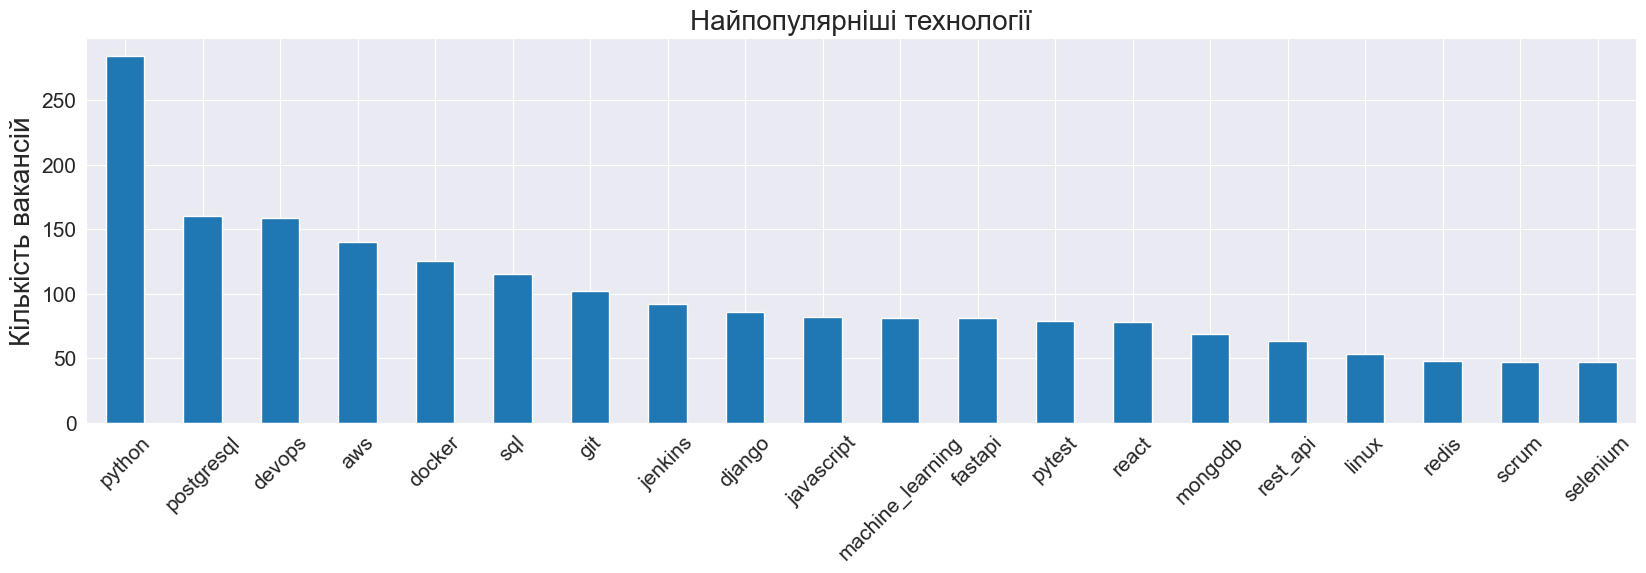

In [11]:
tech_counts.head(20).plot(kind="bar", figsize=(20, 5))

plt.title("Найпопулярніші технології", fontsize=20)
plt.ylabel("Кількість вакансій", fontsize=20)
plt.tick_params(axis="both", labelsize=15)
plt.tick_params(axis="x", rotation=45)

plt.show()


# fontsize=30)
#
#     ax.tick_params(axis="both", labelsize=25)

Сombine all soft skills into one list and count the frequencies of each skill

In [12]:
all_soft_skills = [skills for skills_list in technologies_df["soft_only"] for skills in skills_list]
soft_counts = pd.Series(all_soft_skills).value_counts()
print(soft_counts.dtype)

int64


Building a bar chart for the 10 most popular soft skills

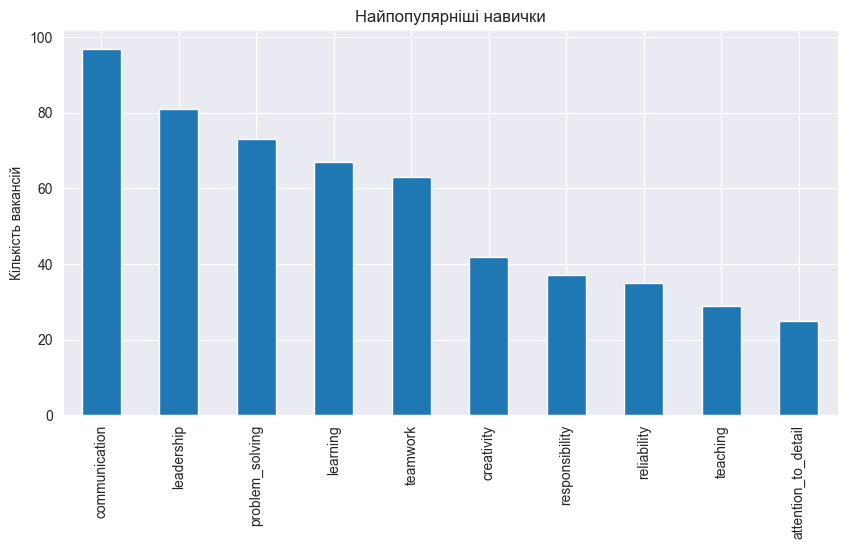

In [13]:
soft_counts.head(10).plot(kind="bar", figsize=(10, 5), title="Найпопулярніші навички")
plt.ylabel("Кількість вакансій")
plt.show()


We delete rows without experience value and without a list of technologies

In [14]:
technologies_df = technologies_df[technologies_df["experience"].notnull()]
technologies_df = technologies_df[technologies_df["tech_only"].notnull()]
technologies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 1 to 290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          179 non-null    object 
 1   title         179 non-null    object 
 2   company       179 non-null    object 
 3   location      179 non-null    object 
 4   salary        44 non-null     object 
 5   experience    179 non-null    float64
 6   link          179 non-null    object 
 7   technologies  179 non-null    object 
 8   pars_tags     179 non-null    object 
 9   tech_only     179 non-null    object 
 10  soft_only     179 non-null    object 
dtypes: float64(1), object(10)
memory usage: 16.8+ KB


Сategorization of experience into levels: Junior, Middle, Senior

In [15]:
def categorize_exp(exp):
    if exp <= 2:
        return "Junior (0–2)"
    elif exp <= 5:
        return "Middle (3–5)"
    else:
        return "Senior (6+)"

technologies_df["experience_level"] = technologies_df["experience"].apply(categorize_exp)
technologies_df

,date,title,company,location,salary,experience,link,technologies,pars_tags,tech_only,soft_only,experience_level
1,26 травня 2025,Senior Python (Django) Backend Engineer,Codify,віддалено,NaN,5.0,https://jobs.dou.ua/companies/codify/vacancies...,"{""technologies"": [""aws"", ""celery"", ""devops"", ""...","{'technologies': ['aws', 'celery', 'devops', '...","[aws, celery, devops, django, docker, javascri...","[problem_solving, reliability]",Middle (3–5)
2,6 травня 2025,Data Scientist / Python developer,UST Ukraine,"Київ, віддалено",NaN,4.0,https://jobs.dou.ua/companies/ust/vacancies/30...,"{""technologies"": [""ai_ml"", ""devops"", ""docker"",...","{'technologies': ['ai_ml', 'devops', 'docker',...","[ai_ml, devops, docker, kubernetes, machine_le...","[communication, leadership, learning]",Middle (3–5)
7,3 червня 2025,Python Marketing Automation Engineer,OpenMinds,"Київ, Львів, Лондон (Велика Британія), віддалено",NaN,3.0,https://jobs.dou.ua/companies/open-minds-insti...,"{""technologies"": [""javascript"", ""machine_learn...","{'technologies': ['javascript', 'machine_learn...","[javascript, machine_learning, openai, python,...","[communication, self_motivation]",Middle (3–5)
8,23 травня 2025,Python Back-End (Web) Developer,CODEWY,"Мюнхен (Німеччина), віддалено",$3000–4000,4.0,https://jobs.dou.ua/companies/codewy-eu/vacanc...,"{""technologies"": [""aws"", ""devops"", ""docker"", ""...","{'technologies': ['aws', 'devops', 'docker', '...","[aws, devops, docker, javascript, jenkins, kub...","[communication, creativity, critical_thinking,...",Middle (3–5)
11,2 червня 2025,Strong Junior Python Developer,Temerix,"Вінниця, віддалено",$1000–1200,1.0,https://jobs.dou.ua/companies/temerix/vacancie...,"{""technologies"": [""git"", ""linux"", ""postgresql""...","{'technologies': ['git', 'linux', 'postgresql'...","[git, linux, postgresql, python, selenium, sql]","[communication, leadership]",Junior (0–2)
...,...,...,...,...,...,...,...,...,...,...,...,...
284,Вакансія від 3 червня 2025,Python mentor,JavaRush,Дистанційна робота,$450-550,2.0,https://www.work.ua/jobs/6579445/,"{""technologies"": [], ""soft_skills"": [""adaptabi...","{'technologies': [], 'soft_skills': ['adaptabi...",[],"[adaptability, communication, organization, re...",Junior (0–2)
285,Вакансія від 2 червня 2025,Senior Python Developer,Tando Financial a.s.,Дистанційна робота,$3300-4350,5.0,https://www.work.ua/jobs/6625288/,"{""technologies"": [""celery"", ""devops"", ""django""...","{'technologies': ['celery', 'devops', 'django'...","[celery, devops, django, docker, fastapi, git,...",[],Middle (3–5)
288,Вакансія від 24 травня 2025,"Fullstack, Python, React Developer",Elementica,Київ,$2353,2.0,https://www.work.ua/jobs/5017342/,"{""technologies"": [""css"", ""devops"", ""docker"", ""...","{'technologies': ['css', 'devops', 'docker', '...","[css, devops, docker, fastapi, javascript, jen...",[responsibility],Junior (0–2)
289,Вакансія від 2 червня 2025,Python Developer,PNN Soft,Київ,NaN,1.0,https://www.work.ua/jobs/5536195/,"{""technologies"": [""aws"", ""devops"", ""docker"", ""...","{'technologies': ['aws', 'devops', 'docker', '...","[aws, devops, docker, git, javascript, mongodb...",[responsibility],Junior (0–2)


We count how many times each technology is mentioned at each experience level, and sort by number

In [16]:
experience_level_counts = (
    technologies_df
    .explode("tech_only")
    .groupby("experience_level")["tech_only"]
    .value_counts()
    .sort_values(ascending=False)
)
experience_level_counts

experience_level  tech_only 
Middle (3–5)      python        85
Junior (0–2)      python        73
Middle (3–5)      devops        55
                  aws           54
                  postgresql    53
                                ..
Senior (6+)       rabbitmq       1
                  selenium       1
                  sensors        1
                  sqlite         1
                  testing        1
Name: count, Length: 131, dtype: int64

Plot a technology distribution graph for a given level of experience.

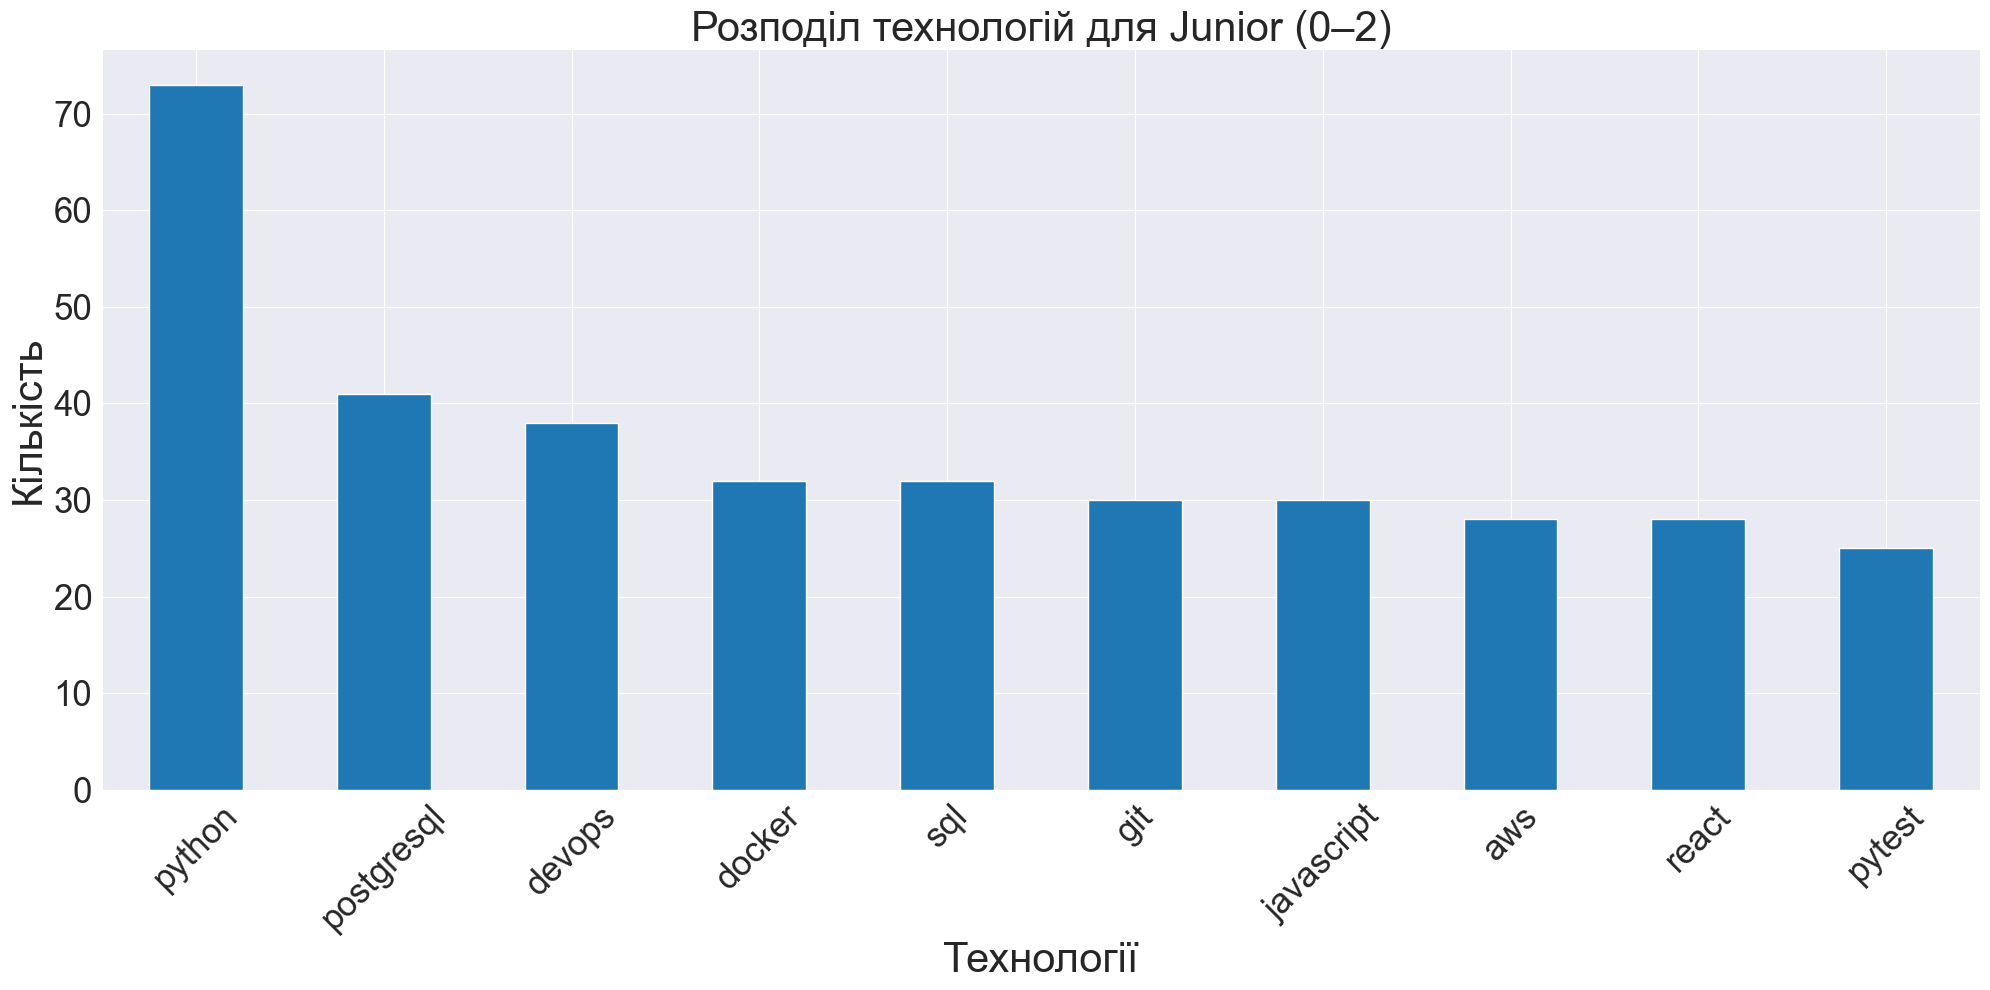

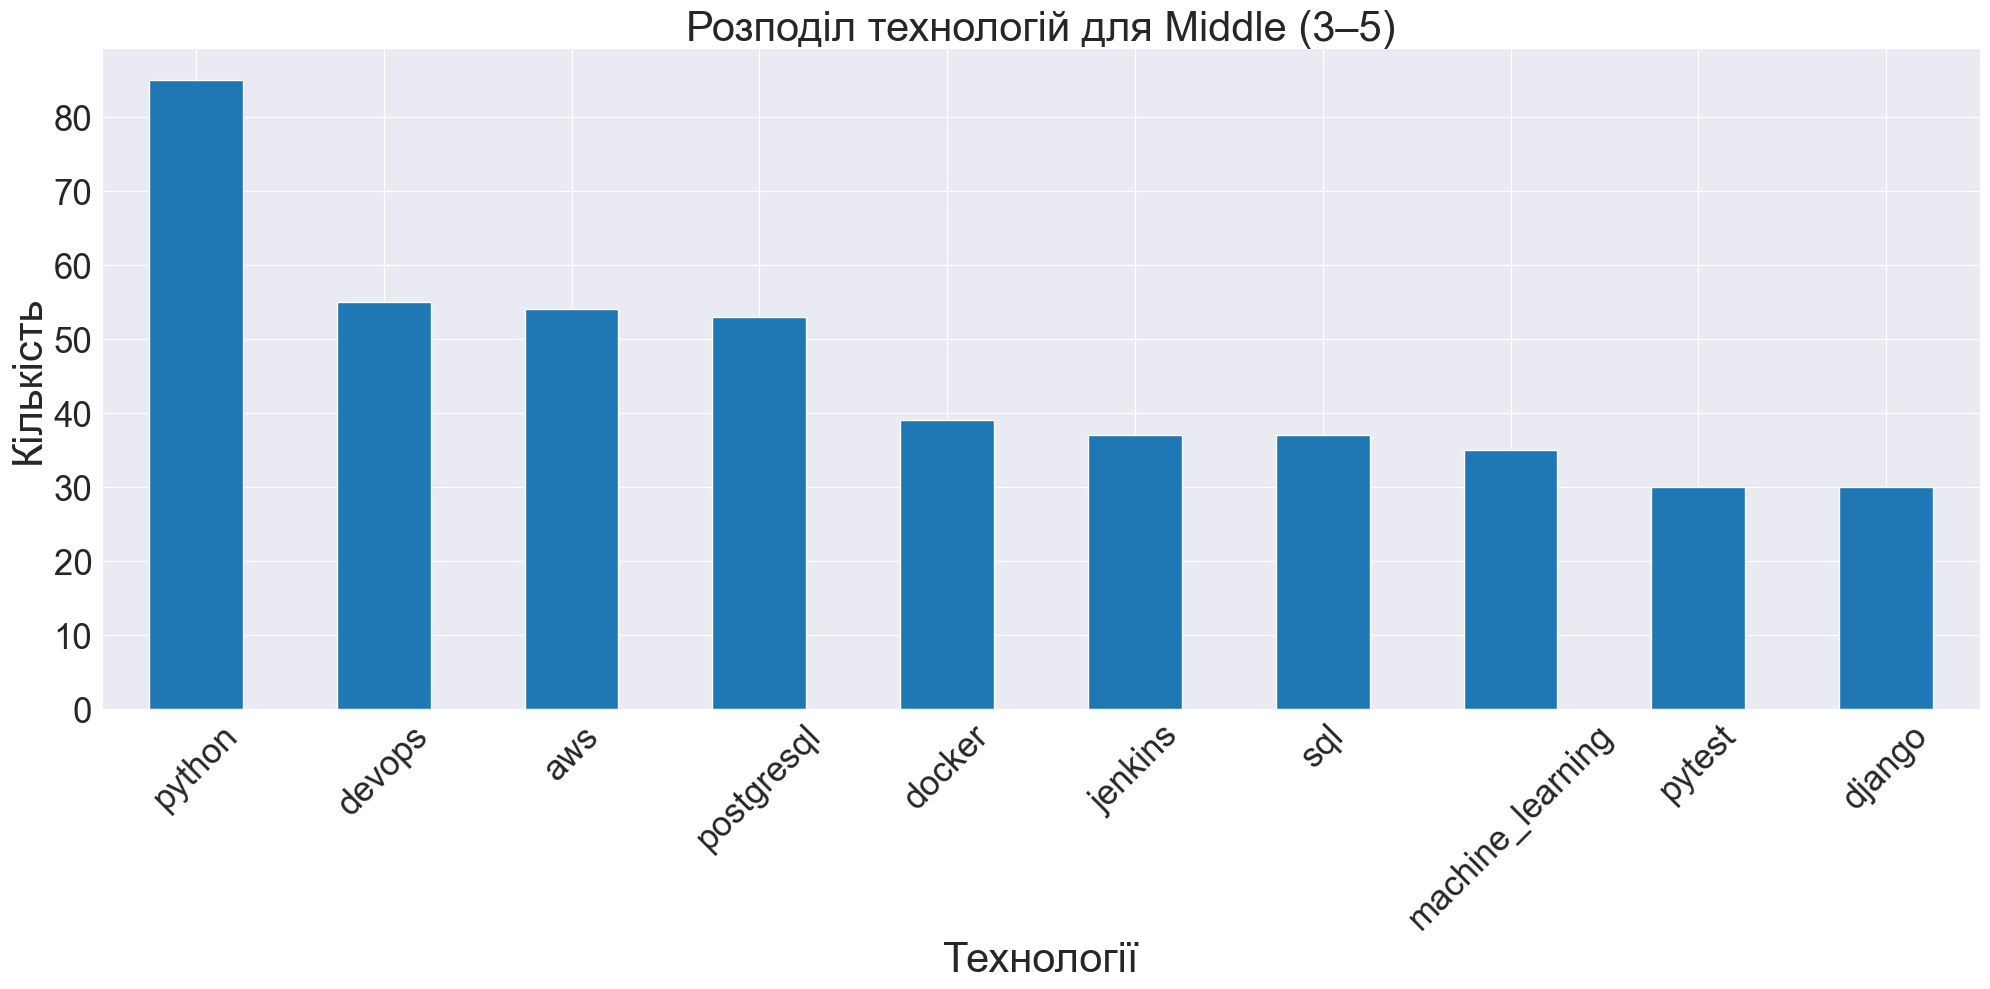

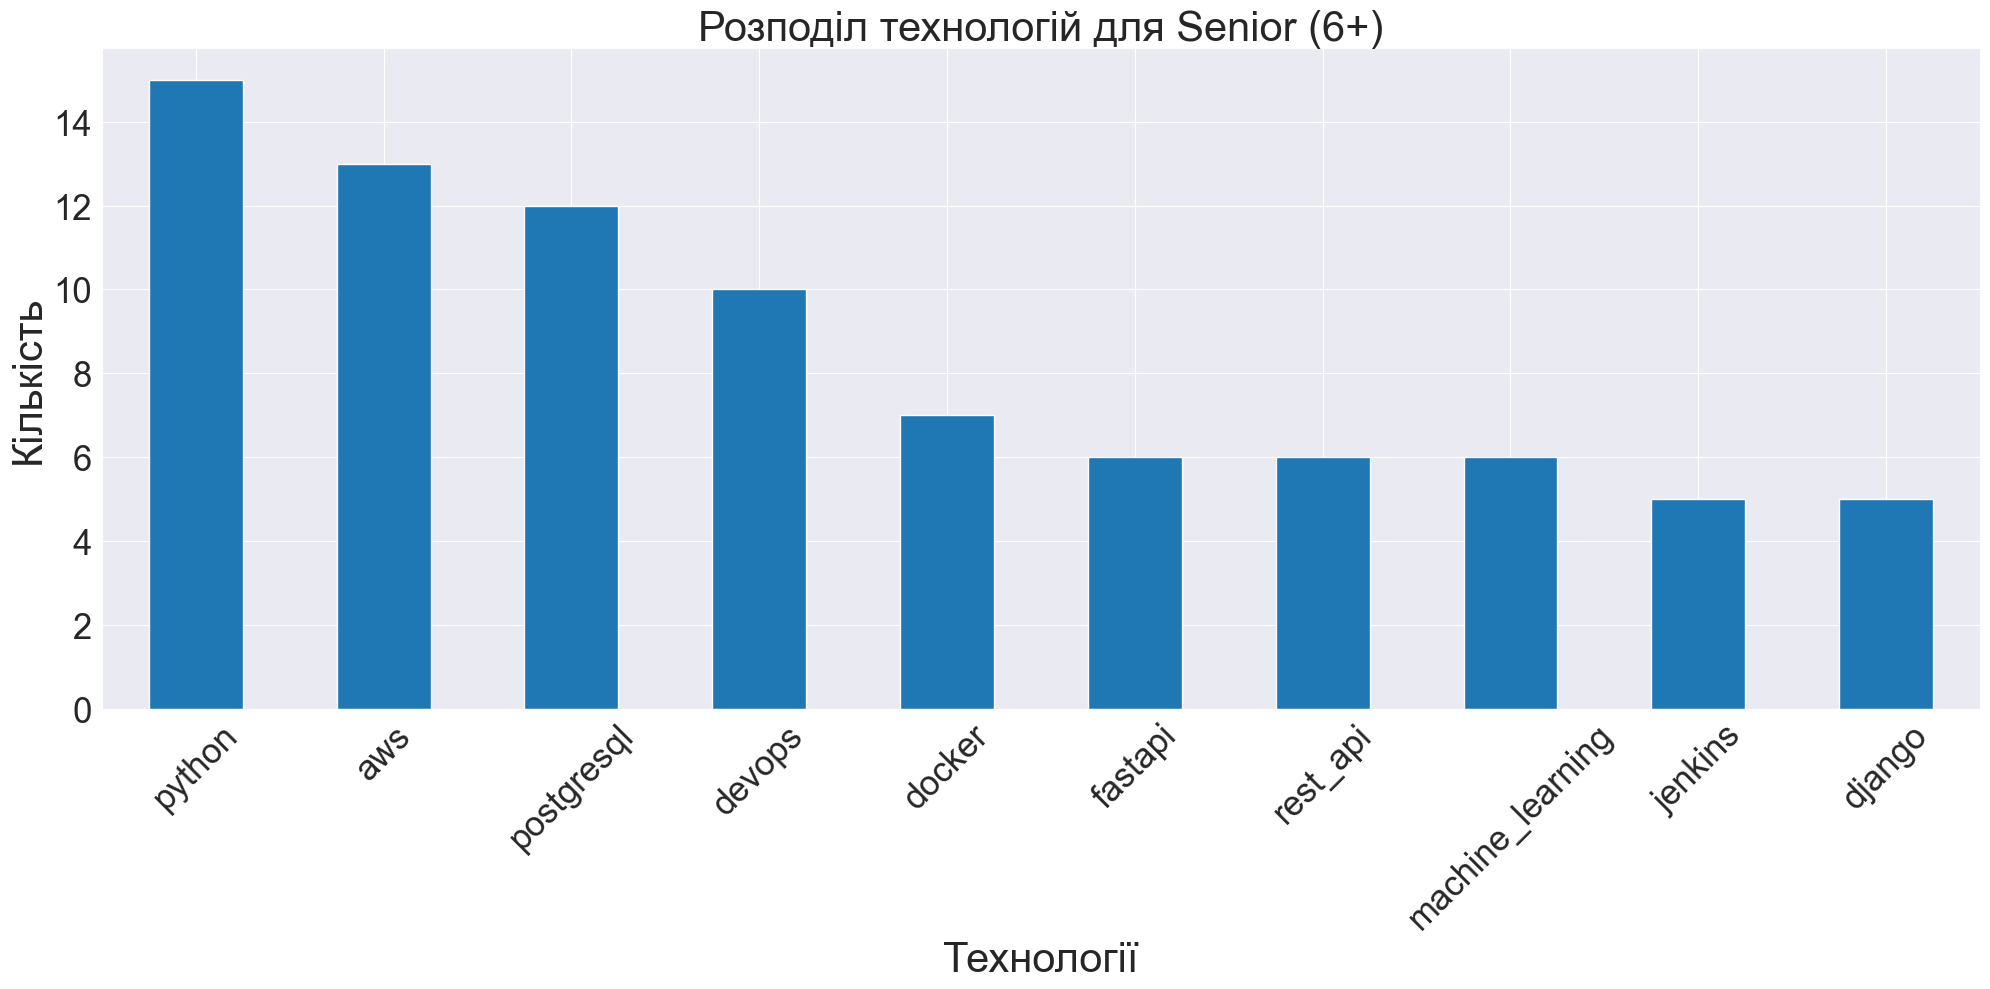

In [17]:
def plot_technology_distribution(data, level, figsize=(20, 10)):

    fig, ax = plt.subplots(figsize=figsize)

    level_data = data.loc[level].nlargest(10)
    level_data.plot(kind='bar', ax=ax)
    ax.set_title(f"Розподіл технологій для {level}", fontsize=30)
    ax.set_xlabel("Технології", fontsize=30)
    ax.set_ylabel("Кількість", fontsize=30)

    ax.tick_params(axis="both", labelsize=25)
    ax.tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

for level in ["Junior (0–2)", "Middle (3–5)", "Senior (6+)"]:
    plot_technology_distribution(experience_level_counts, level)


Analysis of the distribution of experience levels

In [18]:
experience_distribution = (
    technologies_df["experience_level"]
    .value_counts(normalize=True) * 100
).round(2)

print(experience_distribution)

experience_level
Middle (3–5)    48.60
Junior (0–2)    43.02
Senior (6+)      8.38
Name: proportion, dtype: float64


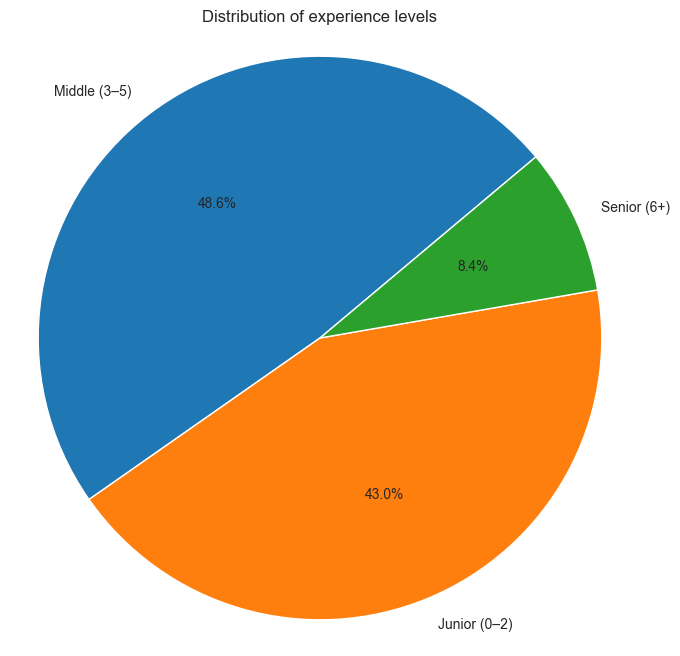

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(experience_distribution, labels=experience_distribution.index.astype(str), autopct='%1.1f%%', startangle=40)
plt.title("Distribution of experience levels")
plt.axis("equal")
plt.show()